# Linear Regression


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [5]:
beer = pd.read_csv('lager_antioxidant_reg.csv')
beer.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [6]:
beer.drop(columns = 'beer', inplace = True)
beer.head()

,tpc,ma,dsa,asa,orac,rp,mca
0,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,146.03,11.72,0.64,0.90,3.18,0.47,9.39


In [12]:
X = beer.iloc[:, beer.columns != 'tpc']
y = beer[['tpc']]

In [16]:
X.shape

(40, 6)

In [17]:
y.shape

(40, 1)

In [21]:
beer_model = LinearRegression().fit(X, y)

print(f'intercept = {beer_model.intercept_}')
print(f'coefficients = {beer_model.coef_}')
print(f'r^2 = {beer_model.score(X, y)}')

intercept = [19.04966435]
coefficients = [[  1.28791969 125.33843146  -0.92370963  -0.93261523  76.61686364
    0.38036155]]
r^2 = 0.8218263273491389


In [22]:
from yellowbrick.regressor import ResidualsPlot

0.8218263273491389

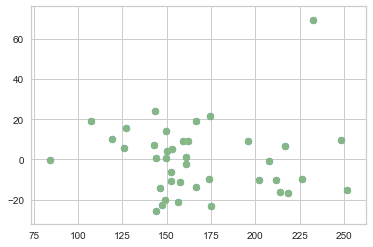

In [25]:
# errors have constant variance

beer_resplot = ResidualsPlot(beer_model, hist = False)
beer_resplot.fit(X, y)
beer_resplot.score(X, y)

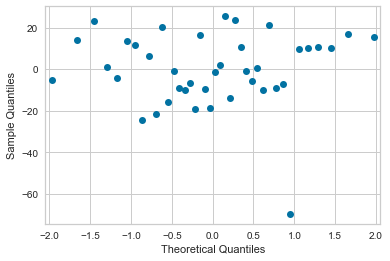

In [47]:
# errors are normally distributed

import statsmodels.api as sm
%matplotlib inline

predictions = beer_model.predict(X)
residuals = y - predictions
resplot = sm.ProbPlot(residuals).qqplot()